<a href="https://colab.research.google.com/github/aysbt/DataScienceProject/blob/master/Predict_the_daily_revenue_for_IceCream_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop a Model to Predict Ice Cream Sales Using Temperature data

## Problem Statatement 

* You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

* Data set:
    * Input (X): Outside Air Temperature
    * Output (Y): Overall daily revenue generated in dollars 

In [2]:
#connect the google colab for dataser file
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Step 1: IMPORT LIBRARIES

In [4]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Load The Data

In [5]:
#load the data
sales_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/SalesData.csv')
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Step3: DATA VISILATION

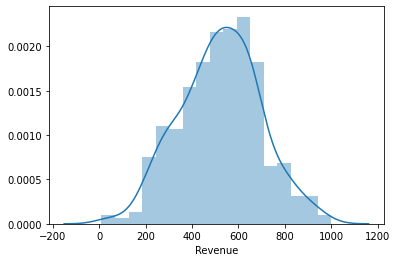

In [15]:

sns.distplot(sales_df['Revenue'])

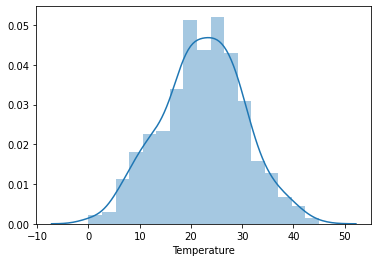

In [16]:
sns.distplot(sales_df['Temperature'])

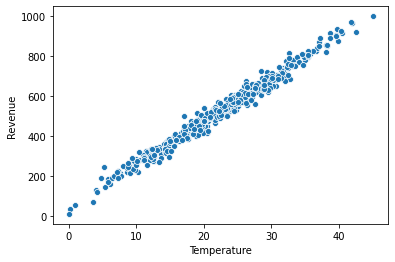

In [17]:
sns.scatterplot(x='Temperature', y='Revenue', data=sales_df)


## Step 4: CREATE A TESTING AND TRAINING DASET

In [18]:
#we  are going to use all data as train
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

## Step 5: BUILD AND TRAIN THE MODEL

In [19]:
print(f'X Train dateset shape: {X_train.shape} \ny train dataset shape: {y_train.shape}')

X Train dateset shape: (500,) 
y train dataset shape: (500,)


In [21]:
#Let's create basic network to solve this problem
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape= [1]))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
epochs_history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 308071.8125
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 266831.2812
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 229164.1250
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 195640.3125
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 166045.7344
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 139866.8281
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 117381.7812
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 97712.9297
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 80694.6641
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 66287.1328
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 54092.1680
Epoch 12/1000
16/16 [==============================] - 0

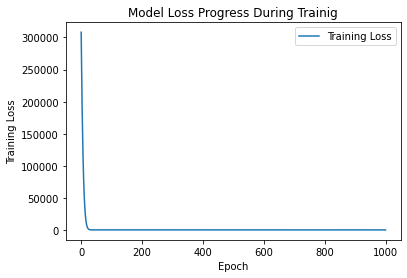

In [25]:
plt.plot(epochs_history.history['loss'])
plt.title('Model Loss Progress During Trainig')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [26]:
model.get_weights()

[array([[21.522503]], dtype=float32), array([44.831882], dtype=float32)]

In [28]:
#use the trained model to perform predictions
Temp = 5
Revenue = model.predict([Temp])
print(f'Revenue Prediction for {Temp} C Temperature Using Trained ANN is {Revenue}')


Revenue Prediction for 5 C Temperature Using Trained ANN is [[152.4444]]


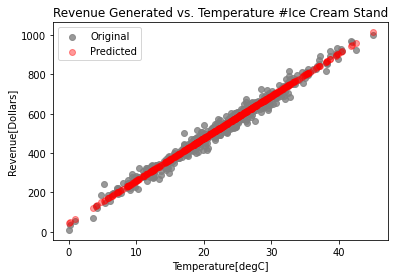

In [33]:
plt.scatter(X_train, y_train, color='gray', alpha=0.8, label='Original')
plt.scatter(X_train, model.predict(X_train), color='red',alpha=0.4, label='Predicted')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature[degC]')
plt.title('Revenue Generated vs. Temperature #Ice Cream Stand')
plt.legend()

In [34]:
# Solve the Problem Using Linear Regression Model

train_X = X_train.values.reshape(-1,1)
train_y = y_train.values.reshape(-1,1)

print(f'train_X shape: {train_X.shape}\ntrain_y shape: {train_y.shape} ')


train_X shape: (500, 1)
train_y shape: (500, 1) 


In [35]:
#import scikit-lerarn libraies
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False)
regressor.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [36]:
print(f'Linear Model Coff(m): {regressor.coef_}')
print(f'Linear Model Coff(b): {regressor.intercept_}')

Linear Model Coff(m): [[23.22442357]]
Linear Model Coff(b): 0.0


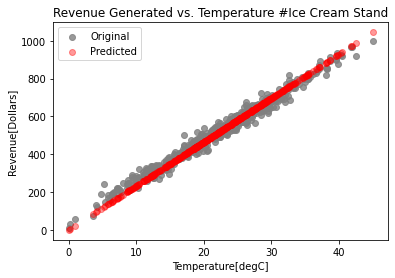

In [37]:
plt.scatter(train_X, train_y, color='gray', alpha=0.8, label='Original')
plt.scatter(train_X, regressor.predict(train_X), color='red',alpha=0.4, label='Predicted')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature[degC]')
plt.title('Revenue Generated vs. Temperature #Ice Cream Stand')
plt.legend()